In [7]:
import requests
import pandas as pd

# URL dos metadados da API BDS
url = "https://api.census.gov/data/timeseries/bds/variables.html"

# Requisição à API para obter os metadados
response = requests.get(url)

if response.status_code == 200:
    # Ler os dados dos metadados como HTML
    metadados = pd.read_html(response.content)
    
    # Geralmente o primeiro DataFrame contém as variáveis e descrições
    df_metadados = metadados[0]
    
    # Exibir as primeiras linhas dos metadados
    print(df_metadados.head())
    
    # Exportar para CSV, se necessário
    df_metadados.to_csv("bds_metadados.csv", index=False)
    print("Metadados exportados para 'bds_metadados.csv'")
else:
    print("Erro ao acessar os metadados:", response.status_code)



     Name                                       Label  \
0    CBSA  Metropolitan/Micropolitan Statistical Area   
1  COUNTY                                      County   
2   DENOM                           (DHS) denominator   
3    EAGE                      Establishment age code   
4     EMP                         Number of employees   

                                             Concept           Required  \
0                                                NaN       not required   
1                                                NaN       not required   
2  Business Dynamics Statistics: Metro: 1978-2022...       not required   
3  Business Dynamics Statistics: Establishment Ag...  default displayed   
4  Business Dynamics Statistics: Metro: 1978-2022...       not required   

   Attributes Limit     Predicate Type  \
0         NaN     0  (not a predicate)   
1         NaN     0  (not a predicate)   
2     DENOM_F     0                int   
3  EAGE_LABEL     0             string

In [23]:
# URL para os metadados
url = "https://api.census.gov/data/timeseries/bds?get=group(BDSEAGE)&NAICS=5617&time=1978&time=1979&time=1980&time=1981&time=1982&time=1983&time=1984&time=1985&time=1986&time=1987&time=1988&time=1989&time=1990&time=1991&time=1992&time=1993&time=1994&time=1995&time=1996&time=1997&time=1998&time=1999&time=2000&time=2001&time=2002&time=2003&time=2004&time=2005&time=2006&time=2007&time=2008&time=2009&time=2010&time=2011&time=2012&time=2013&time=2014&time=2015&time=2016&time=2017&time=2018&time=2019&time=2020&time=2021&time=2022&ucgid=0100000US"

# Requisição à API para obter os metadados
response = requests.get(url)

# Verificar o status da resposta
if response.status_code == 200:
    # Converter o conteúdo da resposta para JSON
    data = response.json()
    
    # Criar um DataFrame a partir dos dados JSON
    df = pd.DataFrame(data)
    
    # Exibir as primeiras linhas para entender a estrutura
    print("Primeiras linhas dos dados:")
    print(df.head())
    
    # Definir a primeira linha como cabeçalho
    new_header = df.iloc[0]  # Pega a primeira linha como cabeçalho
    df = df[1:]  # Remove a primeira linha dos dados
    df.columns = new_header  # Define a nova linha como cabeçalho
    
    # Exibir as primeiras linhas após definir o cabeçalho
    print("\nApós definir o cabeçalho correto:")
    print(df.head())
    
    # Limpeza: Caso tenha colunas desnecessárias, remova ou modifique
    # Exemplo: Excluir colunas com dados de 'None'
    df_clean = df.dropna(axis=1, how='all')  # Remove colunas totalmente vazias
    
    # Exportar para CSV
    df_clean.to_csv("metadados_bds_clean.csv", index=False)
    print("\nMetadados exportados para 'metadados_bds_clean.csv'")

else:
    print(f"Erro ao acessar a API: {response.status_code}")

Primeiras linhas dos dados:
       0        1     2           3       4      5      6        7   \
0   DENOM  DENOM_F  EAGE  EAGE_LABEL     EMP  EMP_F  ESTAB  ESTAB_F   
1  546554     None   001       Total  587071   None  45393     None   
2  611504     None   001       Total  636261   None  49155     None   
3  640501     None   001       Total  643861   None  51196     None   
4  651339     None   001       Total  659697   None  52949     None   

             8               9   ...                50                  51  \
0  ESTABS_ENTRY  ESTABS_ENTRY_F  ...  NET_JOB_CREATION  NET_JOB_CREATION_F   
1         10960            None  ...             80367                None   
2         11769            None  ...             49283                None   
3         11290            None  ...              5957                None   
4         11360            None  ...             17534                None   

                      52                       53                 54  \
0  N

    DENOM DENOM_F  EAGE EAGE_LABEL     EMP EMP_F  ESTAB ESTAB_F  ESTABS_ENTRY  \
0  546554     NaN     1      Total  587071   NaN  45393     NaN         10960   
1  611504     NaN     1      Total  636261   NaN  49155     NaN         11769   
2  640501     NaN     1      Total  643861   NaN  51196     NaN         11290   
3  651339     NaN     1      Total  659697   NaN  52949     NaN         11360   
4  671646     NaN     1      Total  679968   NaN  54074     NaN         10870   

  ESTABS_ENTRY_F  ...  NET_JOB_CREATION NET_JOB_CREATION_F  \
0            NaN  ...             80367                NaN   
1            NaN  ...             49283                NaN   
2            NaN  ...              5957                NaN   
3            NaN  ...             17534                NaN   
4            NaN  ...             16523                NaN   

   NET_JOB_CREATION_RATE NET_JOB_CREATION_RATE_F  REALLOCATION_RATE  \
0                 14.704                     NaN             41.519  

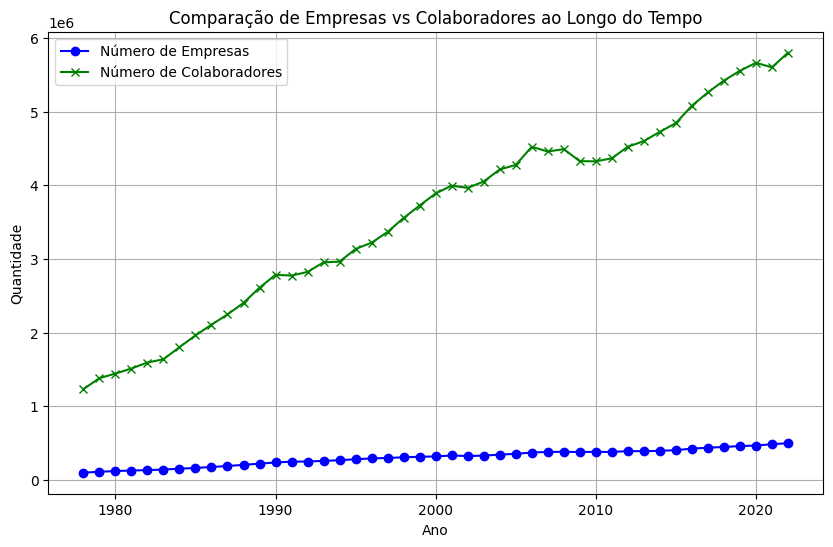

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV com os dados de metadados
df = pd.read_csv("metadados_bds_clean.csv")

# Exibir as primeiras linhas do DataFrame para ver as colunas
print(df.head())

# Limpeza de dados: garantir que as colunas 'ESTAB' (empresas) e 'EMP' (colaboradores) sejam numéricas
df['EMP'] = pd.to_numeric(df['EMP'], errors='coerce')  # Coerce para lidar com valores não numéricos
df['ESTAB'] = pd.to_numeric(df['ESTAB'], errors='coerce')

# Remover linhas com dados ausentes ou incorretos nas colunas de interesse
df_clean = df.dropna(subset=['EMP', 'ESTAB'])

# Agrupar os dados por ano (time) e calcular a soma de empresas e colaboradores por ano
df_grouped = df_clean.groupby('time').agg({'EMP': 'sum', 'ESTAB': 'sum'}).reset_index()

# Exibir os dados agrupados para ver a soma de empresas e colaboradores por ano
print(df_grouped)

# Gerar gráfico de linha para comparar o número de empresas e colaboradores ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['time'], df_grouped['ESTAB'], label='Número de Empresas', color='blue', marker='o')
plt.plot(df_grouped['time'], df_grouped['EMP'], label='Número de Colaboradores', color='green', marker='x')

# Adicionar título e rótulos aos eixos
plt.title('Comparação de Empresas vs Colaboradores ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.legend()

# Exibir o gráfico
plt.grid(True)
plt.show()



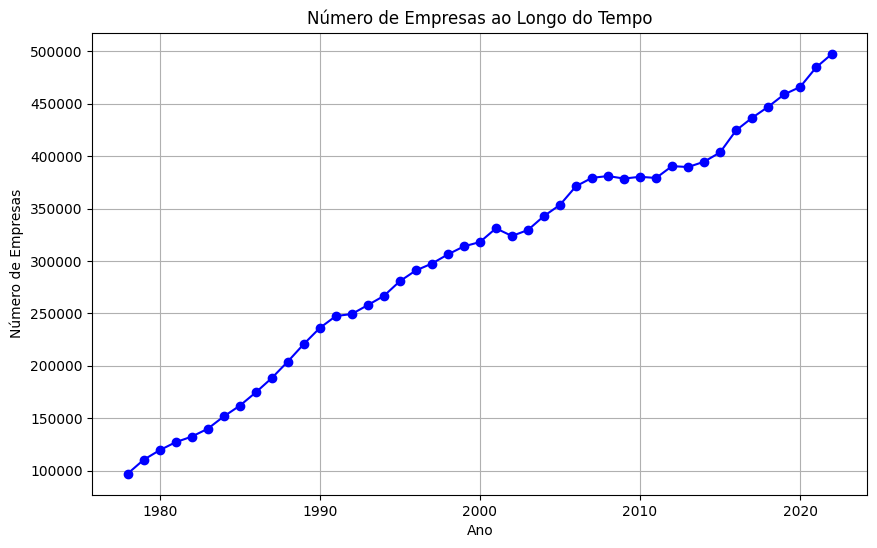

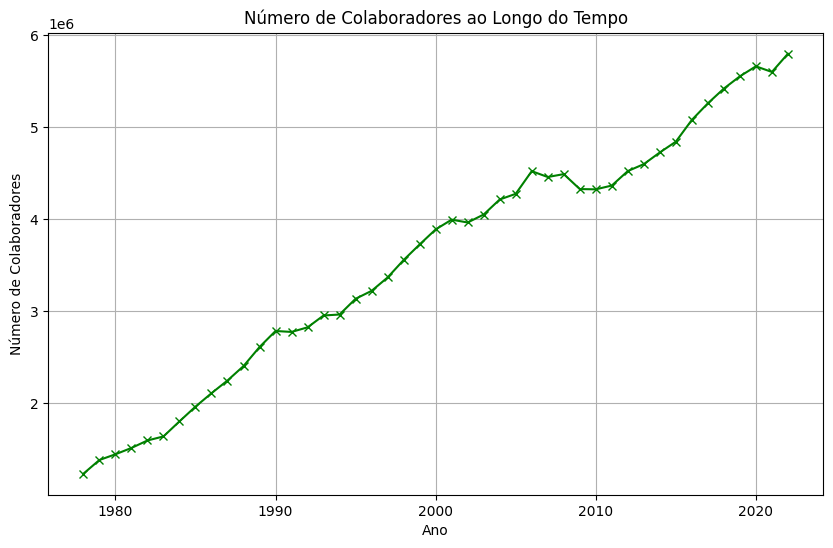

In [26]:
# Gráfico 1: Número de Empresas ao Longo do Tempo
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['time'], df_grouped['ESTAB'], label='Número de Empresas', color='blue', marker='o')

# Adicionar título e rótulos aos eixos
plt.title('Número de Empresas ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Número de Empresas')
plt.grid(True)
plt.show()

# Gráfico 2: Número de Colaboradores ao Longo do Tempo
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['time'], df_grouped['EMP'], label='Número de Colaboradores', color='green', marker='x')

# Adicionar título e rótulos aos eixos
plt.title('Número de Colaboradores ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Número de Colaboradores')
plt.grid(True)
plt.show()

    time      EMP   ESTAB  Colaboradores_por_Empresa
0   1978  1231689   97189                  12.673132
1   1979  1380851  110478                  12.498878
2   1980  1442906  119603                  12.064129
3   1981  1511783  127253                  11.880136
4   1982  1593069  132542                  12.019352
5   1983  1637082  140021                  11.691689
6   1984  1800896  151745                  11.867910
7   1985  1961067  161988                  12.106249
8   1986  2106870  174677                  12.061519
9   1987  2245262  188354                  11.920437
10  1988  2402064  204065                  11.771073
11  1989  2608965  220784                  11.816821
12  1990  2783617  236135                  11.788244
13  1991  2773291  247482                  11.206031
14  1992  2823085  249460                  11.316784
15  1993  2952218  257959                  11.444524
16  1994  2962699  266671                  11.109941
17  1995  3133855  280727                  11.

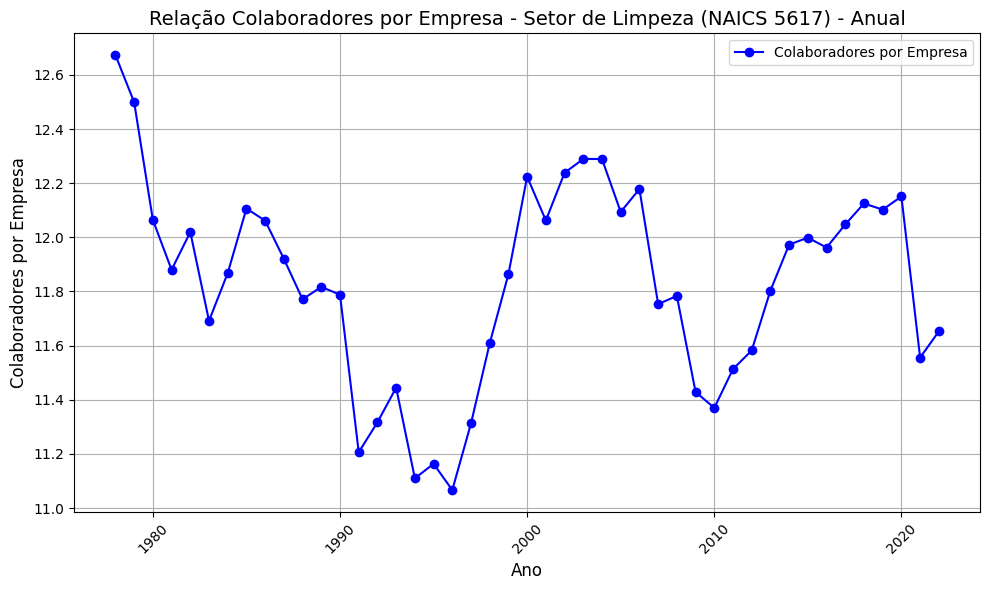

In [29]:
# Agrupar os dados por ano e calcular a soma total de EMP e ESTAB
df_annual = df.groupby('time')[['EMP', 'ESTAB']].sum().reset_index()
    
# Calcular a relação entre colaboradores e empresas
df_annual['Colaboradores_por_Empresa'] = df_annual['EMP'] / df_annual['ESTAB']
  
# Exibir o DataFrame anual
print(df_annual)
    
# Gráfico de linha para visualização
plt.figure(figsize=(10,6))
plt.plot(df_annual['time'], df_annual['Colaboradores_por_Empresa'], marker='o', linestyle='-', color='b', label='Colaboradores por Empresa')
    
# Adicionar título e labels aos eixos
plt.title("Relação Colaboradores por Empresa - Setor de Limpeza (NAICS 5617) - Anual", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Colaboradores por Empresa", fontsize=12)
    
# Exibir gráfico
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

    time      EMP   ESTAB  Colaboradores_por_Empresa
0   1978  1231689   97189                  12.673132
1   1979  1380851  110478                  12.498878
2   1980  1442906  119603                  12.064129
3   1981  1511783  127253                  11.880136
4   1982  1593069  132542                  12.019352
5   1983  1637082  140021                  11.691689
6   1984  1800896  151745                  11.867910
7   1985  1961067  161988                  12.106249
8   1986  2106870  174677                  12.061519
9   1987  2245262  188354                  11.920437
10  1988  2402064  204065                  11.771073
11  1989  2608965  220784                  11.816821
12  1990  2783617  236135                  11.788244
13  1991  2773291  247482                  11.206031
14  1992  2823085  249460                  11.316784
15  1993  2952218  257959                  11.444524
16  1994  2962699  266671                  11.109941
17  1995  3133855  280727                  11.

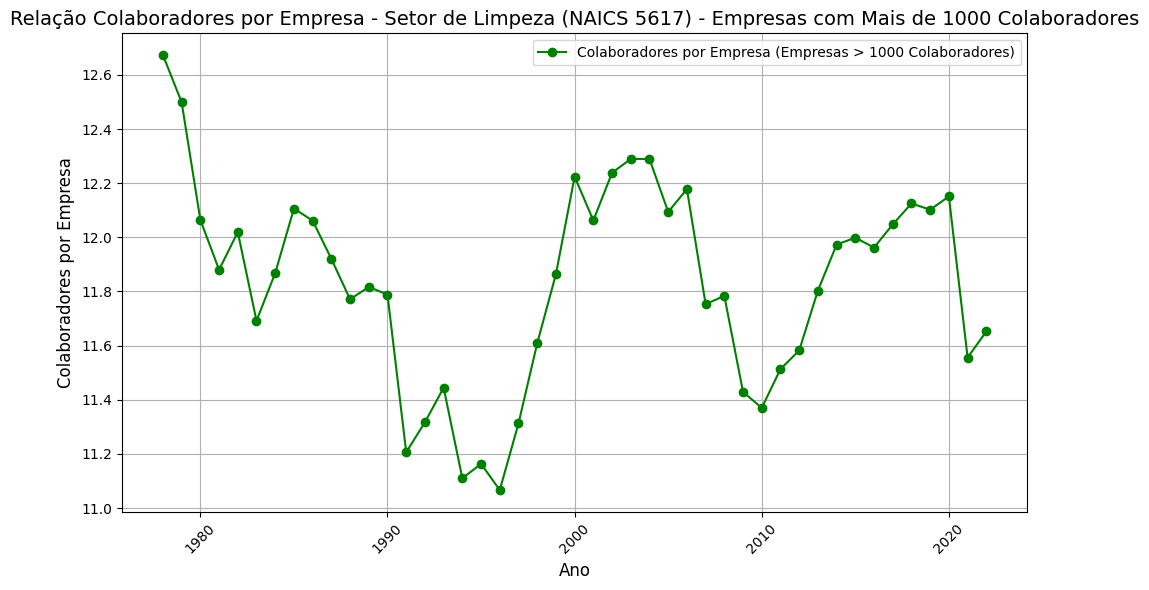

In [30]:
# Filtrar empresas com mais de 1000 colaboradores
df_filtered = df[df['EMP'] > 1000]
   
# Agrupar os dados por ano e calcular a soma total de EMP e ESTAB para empresas com mais de 1000 colaboradores
df_annual_filtered = df_filtered.groupby('time')[['EMP', 'ESTAB']].sum().reset_index()
    
# Calcular a relação entre colaboradores e empresas
df_annual_filtered['Colaboradores_por_Empresa'] = df_annual_filtered['EMP'] / df_annual_filtered['ESTAB']
    
# Exibir o DataFrame anual
print(df_annual_filtered)
    
# Gráfico de linha para visualização
plt.figure(figsize=(10,6))
plt.plot(df_annual_filtered['time'], df_annual_filtered['Colaboradores_por_Empresa'], marker='o', linestyle='-', color='g', label='Colaboradores por Empresa (Empresas > 1000 Colaboradores)')
    
# Adicionar título e labels aos eixos
plt.title("Relação Colaboradores por Empresa - Setor de Limpeza (NAICS 5617) - Empresas com Mais de 1000 Colaboradores", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Colaboradores por Empresa", fontsize=12)
    
# Exibir gráfico
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

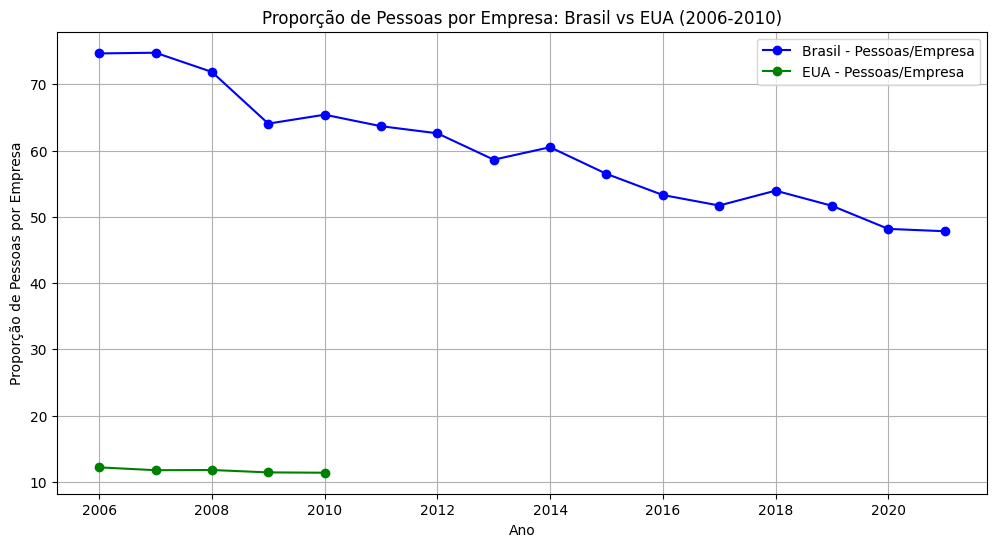

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

empresas = pd.read_csv("empresas_brasil")
pessoas = pd.read_csv("pessoas_brasil")

# Ajustando formato de data e calculando proporção
empresas["ano"] = pd.to_datetime(empresas["ano"]).dt.year
brasil = empresas.merge(pessoas, left_on="ano", right_on="Ano")
brasil["Proporção"] = brasil["Valor"] / brasil["valor"]



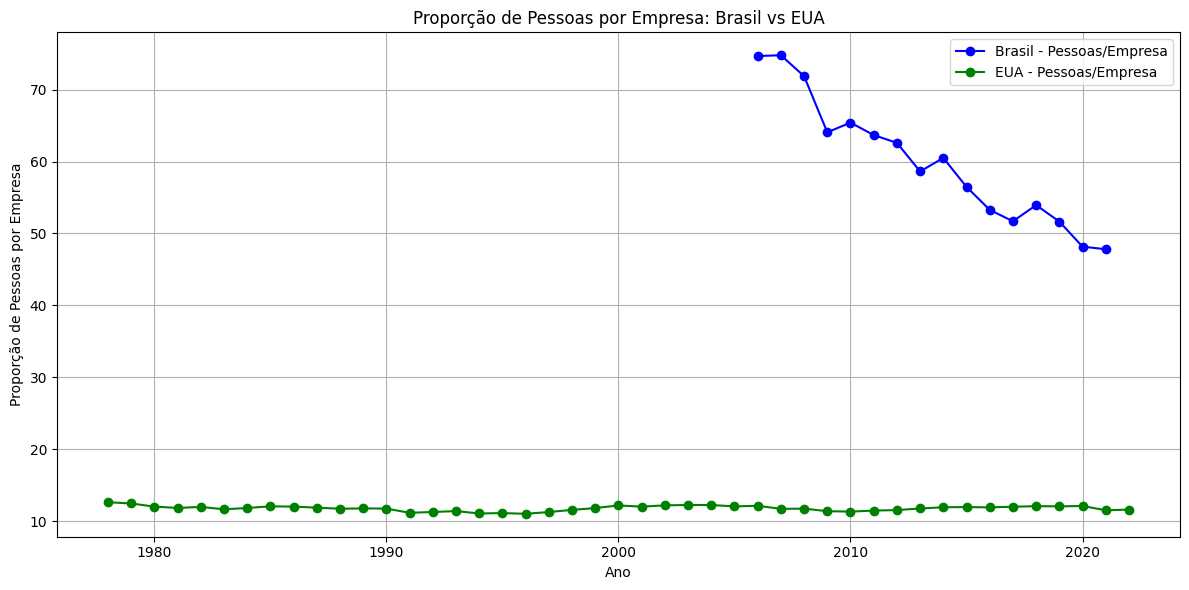

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando dados do Brasil
empresas = pd.read_csv("empresas_brasil")
pessoas = pd.read_csv("pessoas_brasil")

# Ajustando formato de data e calculando proporção Brasil
empresas["ano"] = pd.to_datetime(empresas["ano"]).dt.year
brasil = empresas.merge(pessoas, left_on="ano", right_on="Ano")
brasil["Proporção"] = brasil["Valor"] / brasil["valor"]

# Dados do EUA
eua = df_annual[["time", "Colaboradores_por_Empresa"]].rename(
    columns={"time": "Ano", "Colaboradores_por_Empresa": "Proporção"}
)

# Gráfico comparativo
plt.figure(figsize=(12, 6))

# Plotando Brasil
plt.plot(
    brasil["ano"],
    brasil["Proporção"],
    label="Brasil - Pessoas/Empresa",
    marker="o",
    color="blue",
)

# Plotando EUA
plt.plot(
    eua["Ano"],
    eua["Proporção"],
    label="EUA - Pessoas/Empresa",
    marker="o",
    color="green",
)

# Configurações do gráfico
plt.title("Proporção de Pessoas por Empresa: Brasil vs EUA")
plt.xlabel("Ano")
plt.ylabel("Proporção de Pessoas por Empresa")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Exibindo o gráfico
plt.show()


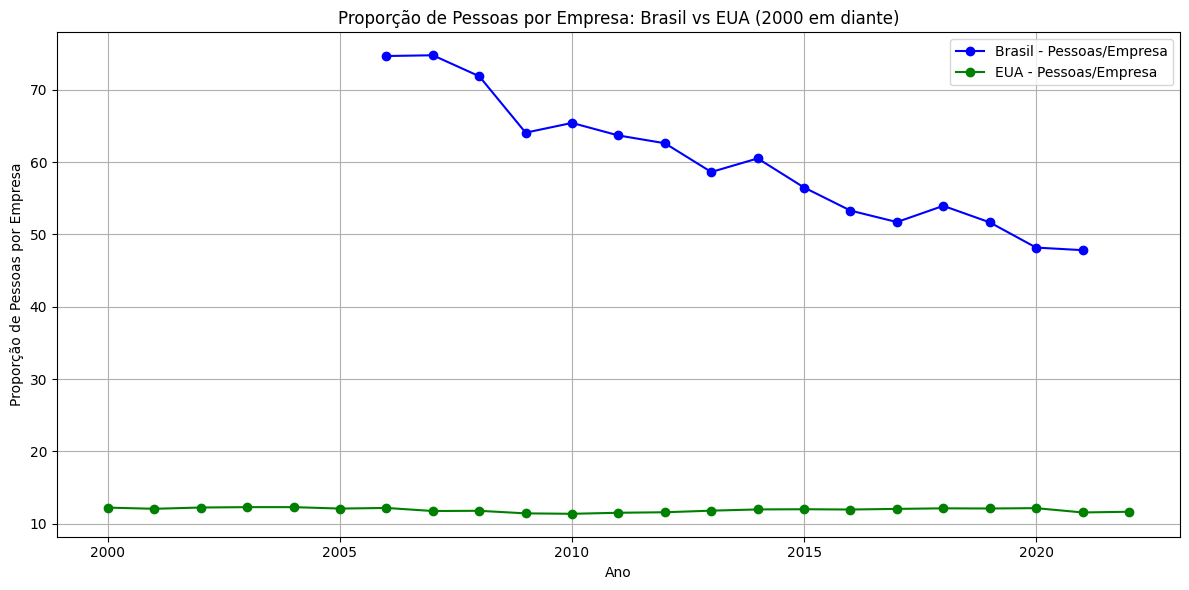

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando dados do Brasil
empresas = pd.read_csv("empresas_brasil")
pessoas = pd.read_csv("pessoas_brasil")

# Ajustando formato de data e calculando proporção Brasil
empresas["ano"] = pd.to_datetime(empresas["ano"]).dt.year
brasil = empresas.merge(pessoas, left_on="ano", right_on="Ano")
brasil["Proporção"] = brasil["Valor"] / brasil["valor"]

# Filtrar dados do Brasil a partir de 2000
brasil = brasil[brasil["ano"] >= 2000]

# Dados do EUA
eua = df_annual[["time", "Colaboradores_por_Empresa"]].rename(
    columns={"time": "Ano", "Colaboradores_por_Empresa": "Proporção"}
)

# Filtrar dados do EUA a partir de 2000
eua = eua[eua["Ano"] >= 2000]

# Gráfico comparativo
plt.figure(figsize=(12, 6))

# Plotando Brasil
plt.plot(
    brasil["ano"],
    brasil["Proporção"],
    label="Brasil - Pessoas/Empresa",
    marker="o",
    color="blue",
)

# Plotando EUA
plt.plot(
    eua["Ano"],
    eua["Proporção"],
    label="EUA - Pessoas/Empresa",
    marker="o",
    color="green",
)

# Configurações do gráfico
plt.title("Proporção de Pessoas por Empresa: Brasil vs EUA (2000 em diante)")
plt.xlabel("Ano")
plt.ylabel("Proporção de Pessoas por Empresa")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Exibindo o gráfico
plt.show()
